In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#load the dataset
df = pd.read_csv('Maternal-Health-Risk-Data-Set.csv')
#Preprocessing the Target Variable
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)

print("--- Preprocessed Data Head ---")
print(df.head())

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

#Split the data into training and testing sets
#80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

#Train the Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000) # max_iter = model converge
log_reg_model.fit(X_train, y_train)

#Make Predictions on the Test Set
y_pred = log_reg_model.predict(X_test)

#Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.2f}")

#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['low risk', 'mid risk', 'high risk']))

--- Preprocessed Data Head ---
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86          2
1   35         140           90  13.0      98.0         70          2
2   29          90           70   8.0     100.0         80          2
3   30         140           85   7.0      98.0         70          2
4   35         120           60   6.1      98.0         76          0

Training set size: 811 samples
Testing set size: 203 samples

--- Model Evaluation ---
Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

    low risk       0.62      0.89      0.73        80
    mid risk       0.68      0.28      0.39        76
   high risk       0.70      0.85      0.77        47

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203



C:\Users\shaha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Training Logistic Regression on SCALED Data ---
Classification Report (Logistic Regression on Scaled Data):
              precision    recall  f1-score   support

    low risk       0.62      0.89      0.73        80
    mid risk       0.68      0.28      0.39        76
   high risk       0.70      0.85      0.77        47

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203


--- Training a Random Forest Model ---

Classification Report (Random Forest):
              precision    recall  f1-score   support

    low risk       0.86      0.75      0.80        80
    mid risk       0.74      0.84      0.79        76
   high risk       0.87      0.85      0.86        47

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.81      0.81      0.81       203


--- Confusion Matrix for Random Forest ---


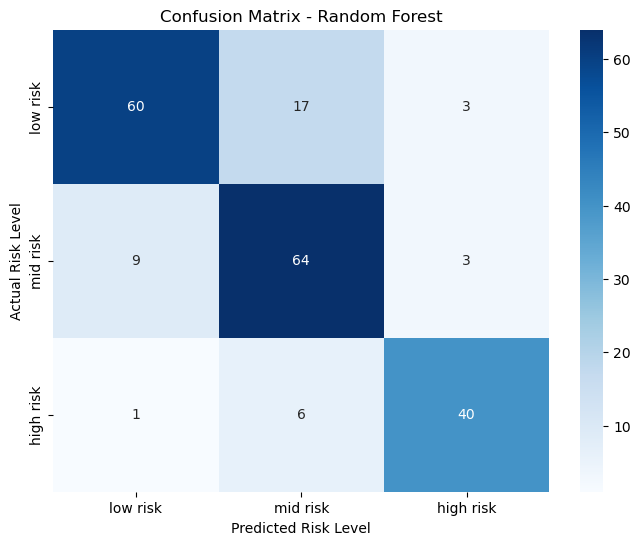

In [10]:
# --- SCALING DATA & BUILDING A BETTER MODEL ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #<--
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Load and Preprocess Data
df = pd.read_csv('Maternal-Health-Risk-Data-Set.csv')
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the Feature Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Logistic Regression model on the SCALED data
print("--- Training Logistic Regression on SCALED Data ---")
log_reg_scaled_model = LogisticRegression(random_state=42)
log_reg_scaled_model.fit(X_train_scaled, y_train)
y_pred_log_reg_scaled = log_reg_scaled_model.predict(X_test_scaled)
print("Classification Report (Logistic Regression on Scaled Data):")
print(classification_report(y_test, y_pred_log_reg_scaled, target_names=['low risk', 'mid risk', 'high risk']))


#BUILDING AND EVALUATING THE RANDOM FOREST MODEL
print("\n--- Training a Random Forest Model ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['low risk', 'mid risk', 'high risk']))

#visualize the Random Forest's performance with a confusion matrix
print("\n--- Confusion Matrix for Random Forest ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
class_names = ['low risk', 'mid risk', 'high risk']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Risk Level')
plt.xlabel('Predicted Risk Level')
plt.show()

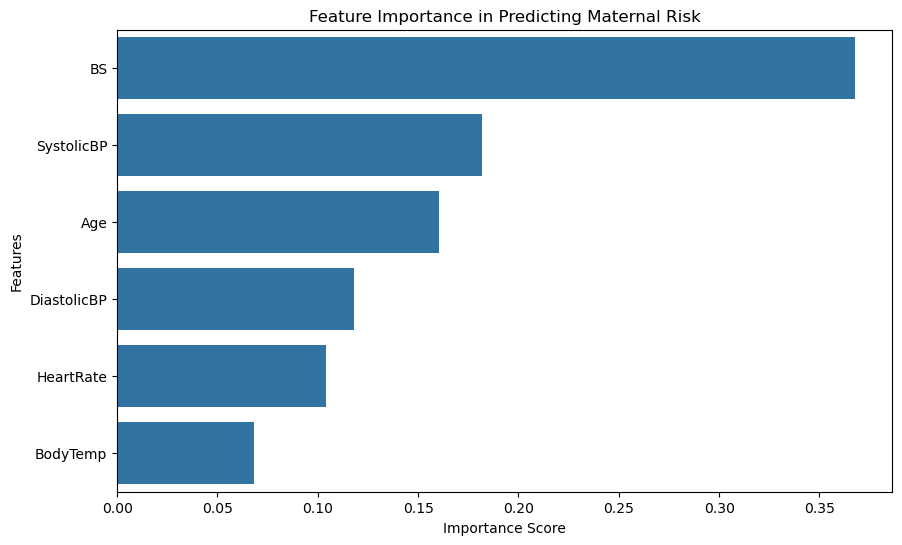

BS             0.367830
SystolicBP     0.181785
Age            0.160320
DiastolicBP    0.118060
HeartRate      0.104043
BodyTemp       0.067963
dtype: float64


In [12]:
# --- FEATURE IMPORTANCE ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load, preprocess, and split data
df = pd.read_csv('Maternal-Health-Risk-Data-Set.csv')
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training final Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# --- Get and Visualize Feature Importances ---

# Pandas Series to hold the feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance in Predicting Maternal Risk')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print(feature_importances)

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_text
#Train a simple Decision Tree with a limited depth for simple rules
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_train, y_train) #original X_train

#Get the rules in a text format
tree_rules = export_text(simple_tree, feature_names=list(X.columns))
print("--- Copy These Decision Tree Rules ---")
print(tree_rules)

--- Copy These Decision Tree Rules ---
|--- BS <= 7.95
|   |--- SystolicBP <= 132.50
|   |   |--- BS <= 7.06
|   |   |   |--- class: 1
|   |   |--- BS >  7.06
|   |   |   |--- class: 0
|   |--- SystolicBP >  132.50
|   |   |--- BS <= 6.75
|   |   |   |--- class: 1
|   |   |--- BS >  6.75
|   |   |   |--- class: 2
|--- BS >  7.95
|   |--- SystolicBP <= 135.00
|   |   |--- BS <= 9.50
|   |   |   |--- class: 1
|   |   |--- BS >  9.50
|   |   |   |--- class: 2
|   |--- SystolicBP >  135.00
|   |   |--- class: 2

